TEST CVS


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 



In [2]:
data=pd.read_csv('/home/dawid/Desktop/Temat1/pandas-csv/subject-1-walking.csv')
#data=pd.read_pickle('/home/dawid/Desktop/Temat1/pandas-csv/subject-1-walking.pkl')
#print(data.E_I)

#data.E_I[1]=10
#print(data.E_I[1])
data.head()

,Unnamed: 0,E_I,E_II,E_III,cs
0,0,-1.520,-2.970,-1.450,0.299
1,1,-1.532,-2.982,-1.450,0.319
2,2,-1.792,-2.653,-0.861,0.359
3,3,-1.940,-2.391,-0.451,0.398
4,4,-1.766,-2.559,-0.793,0.392


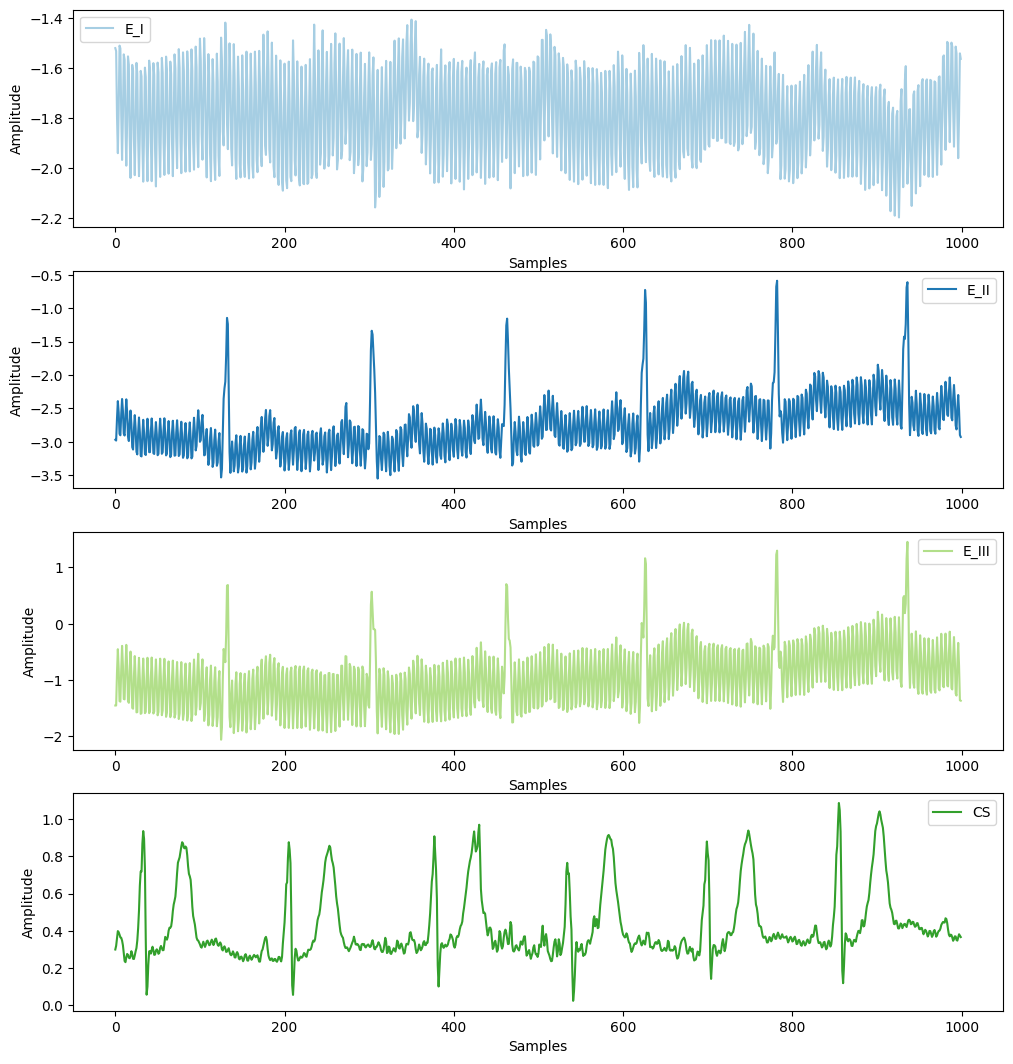

In [3]:
fig,axes=plt.subplots(4,1,figsize=(12,13))

leads=['E_I','E_II','E_III','CS']
for i,ax in enumerate(axes.flatten()):
  y=data.iloc[0:1000,i+1].values  # y=data.iloc[0:1000,1].values    probko od 0 do 1000   i number kolumny w tym przypadku data.E_I
  ax.plot(y,color=plt.cm.Paired(i/10.),label=leads[i])
  axes[i].set_ylabel('Amplitude')
  axes[i].set_xlabel('Samples')
  #axes[i].set_label(leads[i])
  axes[i].legend()
plt.savefig('/home/dawid/Desktop/ecg.pdf')
plt.show()


In [4]:

y=np.array(data.E_I)
print(np.min(y))

-4.34


MY OWN CSV/PKL



In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import scipy.signal


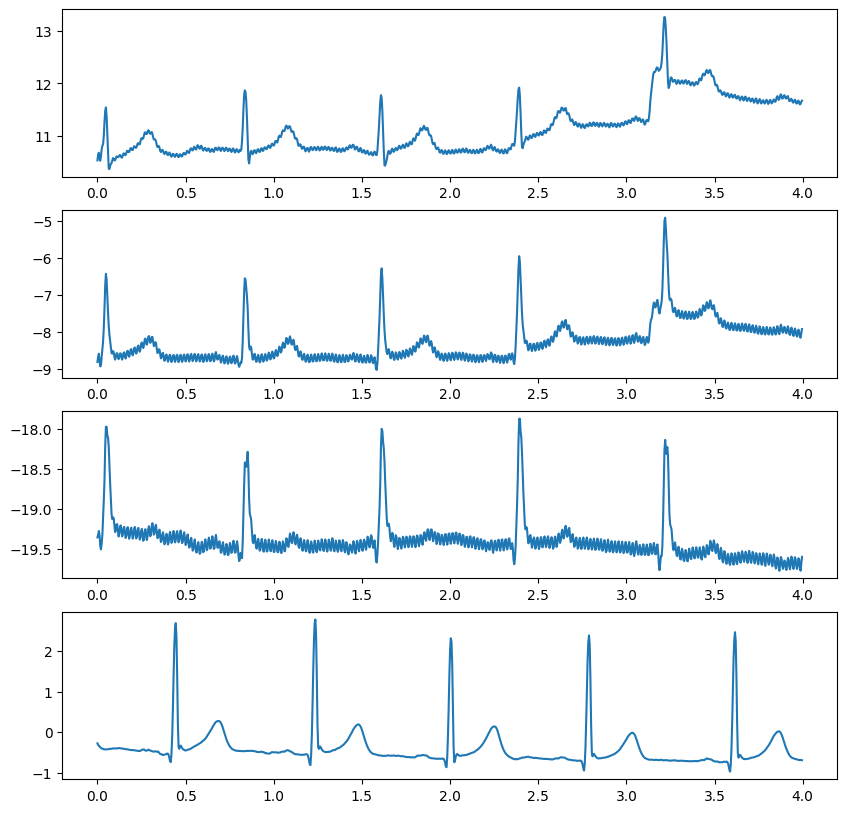

In [3]:
dataCSV=pd.read_csv('/home/dawid/Desktop/Temat1/pandas-csv/subject-10-sitting.csv')
dataPKL=pd.read_pickle('/home/dawid/Desktop/Temat1/pandas-csv/subject-1-walking.pkl')


datarange=[0,1000] #max 30000
DelData=[0]  # które kolumny
CSVFile=np.array(dataCSV.T)
CSVFileTime=CSVFile[0]/250
CSVFile=np.delete(CSVFile,DelData,axis=0)

fig, ax = plt.subplots(len(CSVFile),1,figsize=(10,10))
h=0
for data in CSVFile:
    ax[h].plot(CSVFileTime[datarange[0]:datarange[1]],data[datarange[0]:datarange[1]])
    h=h+1
plt.show()



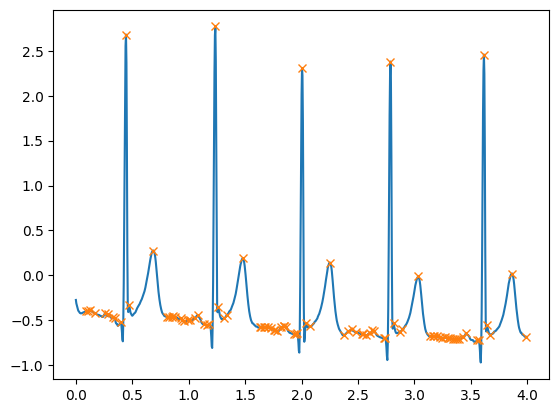

In [4]:
signal=CSVFile[-1][datarange[0]:datarange[1]]
signaltime=CSVFileTime[datarange[0]:datarange[1]]

peaks,_=scipy.signal.find_peaks(signal)

plt.plot(signaltime,signal)
plt.plot(signaltime[peaks],signal[peaks],"x")
plt.show()

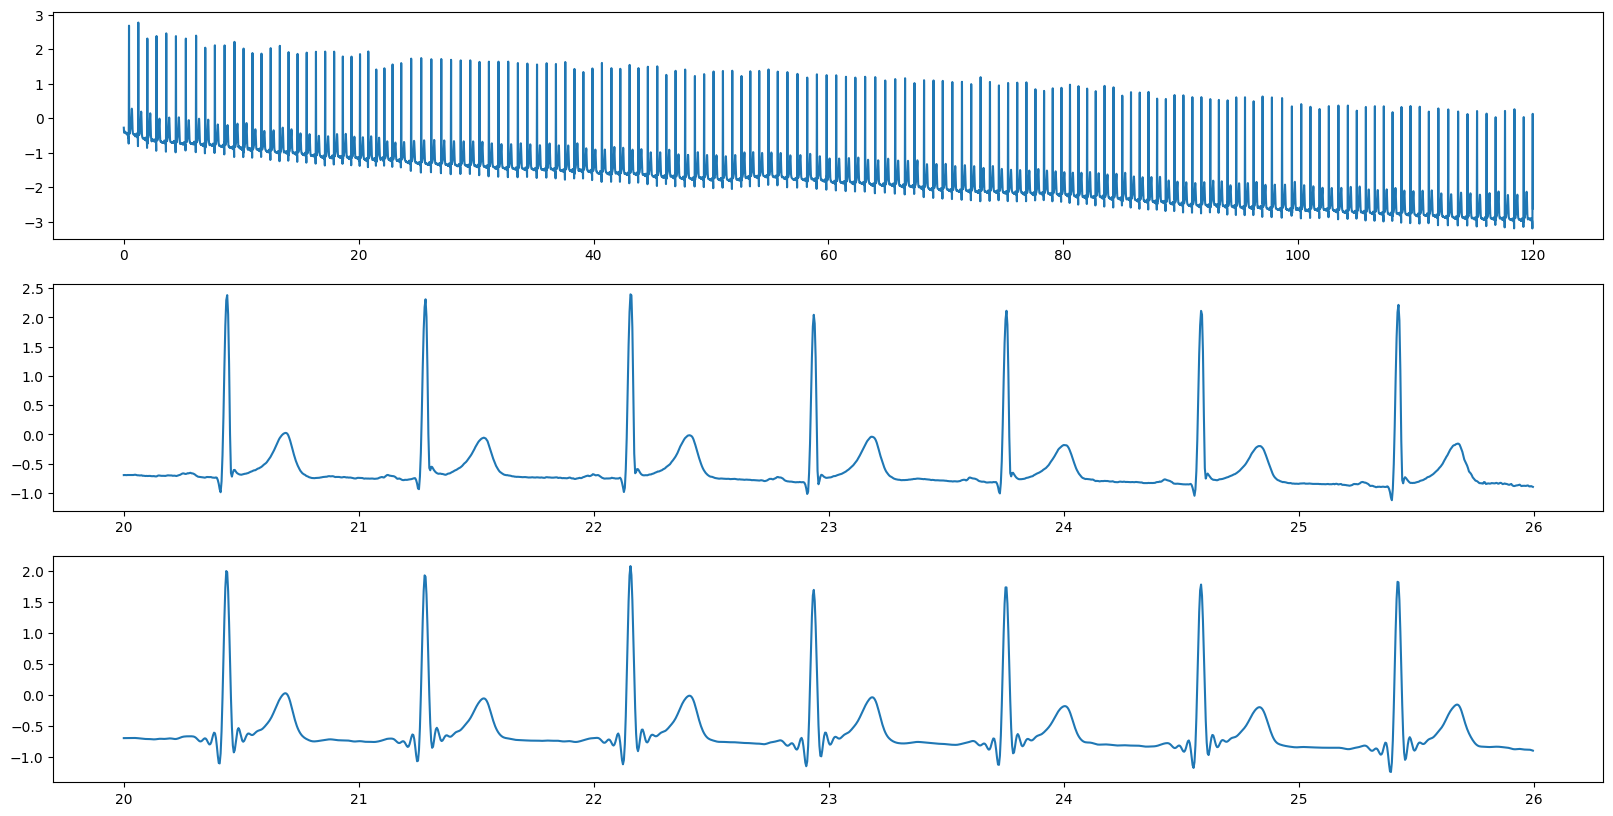

In [5]:
fig,ax=plt.subplots(3,1,figsize=(20,10))
signal=CSVFile[-1]
signaltime=CSVFileTime
signal6s=CSVFile[-1][1000:2500] #6 sek
signaltime6s=CSVFileTime[5000:6500]
Fs=250
W=15/125
b,a=scipy.signal.butter(7,0.2,btype ='low',analog=False)
signalfilt=scipy.signal.filtfilt(b,a,signal6s)

ax[0].plot(signaltime,signal)
ax[1].plot(signaltime6s,signal6s)
ax[2].plot(signaltime6s,signalfilt)

/home/dawid/.local/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


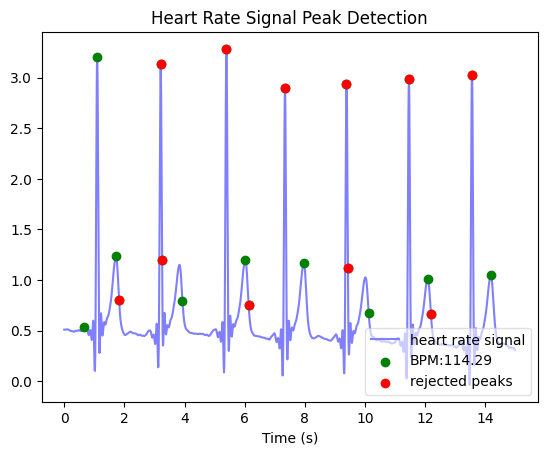

In [6]:
import heartpy as hp

data = hp.get_data('/home/dawid/Desktop/Temat1/pandas-csv/subject-10-jogging.csv')
working_data, measures = hp.process(signalfilt, 100.0)
hp.plotter(working_data, measures)

0.08662540498893699


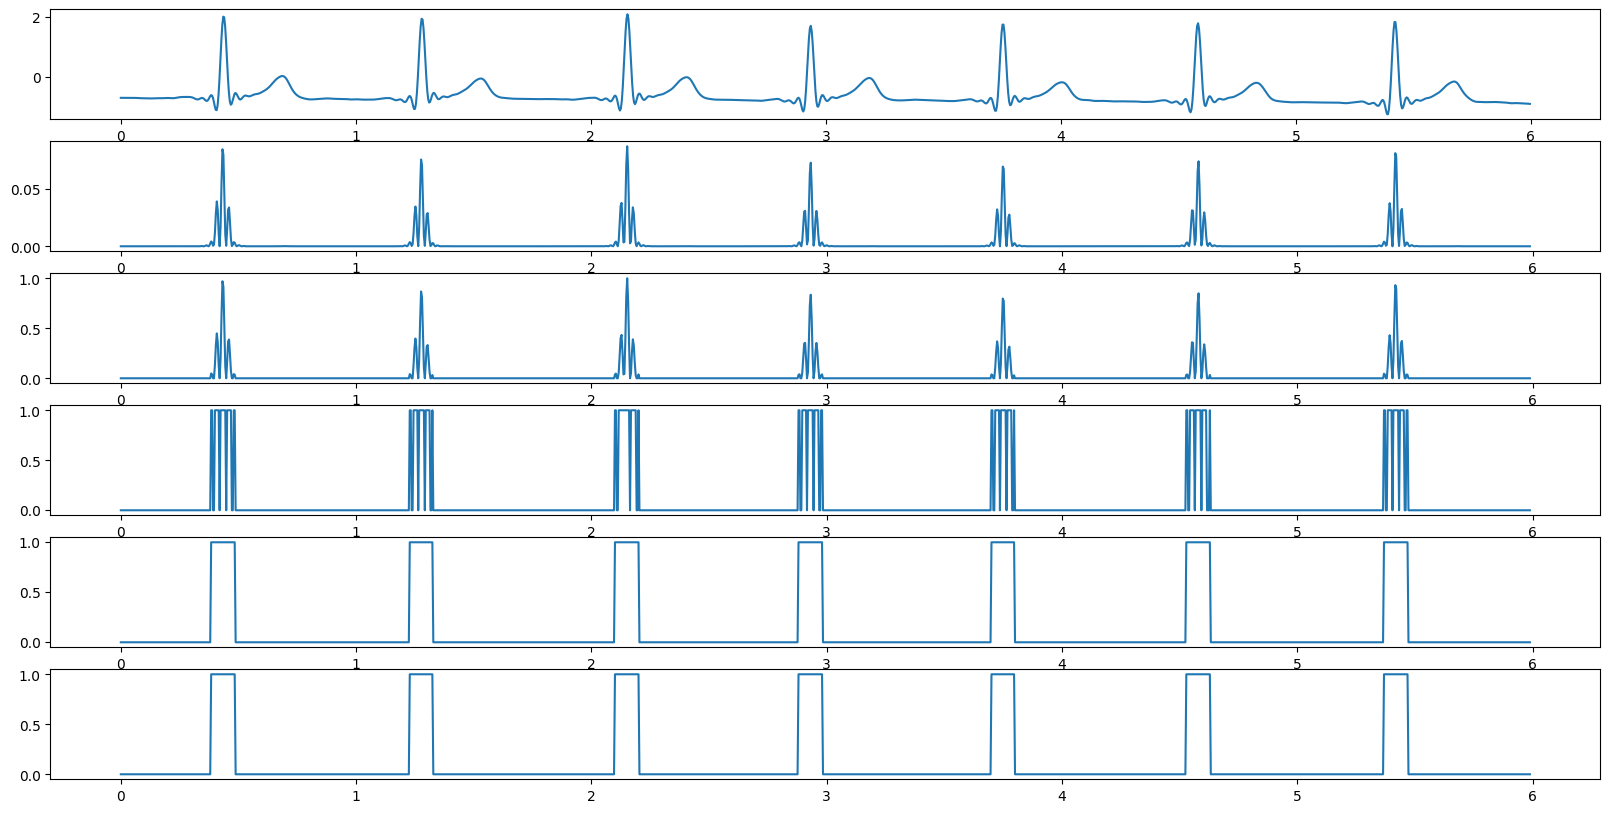

In [7]:
def doblesquare(data):
    data1=[]
    data2=[]
   
    for i in range(len(data)-1):
        data1.append(data[i+1]-data[i])
    for i in range(len(data1)-1):
        data2.append(data1[i+1]-data1[i])
    return   np.square(data2)
    

squareddata=doblesquare(signalfilt)
fig,ax=plt.subplots(6,1,figsize=(20,10))
ax[0].plot(signaltime[:len(signalfilt)],signalfilt)




ax[1].plot(signaltime[:len(squareddata)],squareddata)



maxvalue=np.max(squareddata)
print(maxvalue)
squareddataNORM=squareddata/maxvalue

for i in range(len(squareddataNORM)):
    if squareddataNORM[i]<(0.03):
        squareddataNORM[i]=0
        
ax[2].plot(signaltime[:len(squareddataNORM)],squareddataNORM)



#ax[3].plot(signaltime[:len(squareddata)],squareddatafilt)

dataMaxed=squareddataNORM

for i in range(len(dataMaxed)):
    if dataMaxed[i]>0:
        dataMaxed[i]=1

ax[3].plot(signaltime[:len(dataMaxed)],dataMaxed)


filtredBouncing=dataMaxed

filtr=4
counter=0
for i in range(len(filtredBouncing)):
    if filtredBouncing[i]==1:
        for j in range(filtr):
            if filtredBouncing[i+j+1]==0:
                counter=counter+1
        if counter<4:
            filtredBouncing[i+1]=1   
        counter=0
ax[4].plot(signaltime[:len(filtredBouncing)],filtredBouncing)      
            
    
QRSwindow=filtredBouncing

i=0
while(i<len(QRSwindow)):
    if QRSwindow[i]==1:
        j=0
        while(QRSwindow[i+j]==1):
            
            j+=1         
        if j<15:
            for h in range(j):
                QRSwindow[i+h]=0
        else:
            i=i+j
    i+=1

ax[5].plot(signaltime[:len(QRSwindow)],QRSwindow)      


1498
[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367]
[96, 121, 307, 331, 525, 550, 720, 745, 925, 9

72.23113964686998

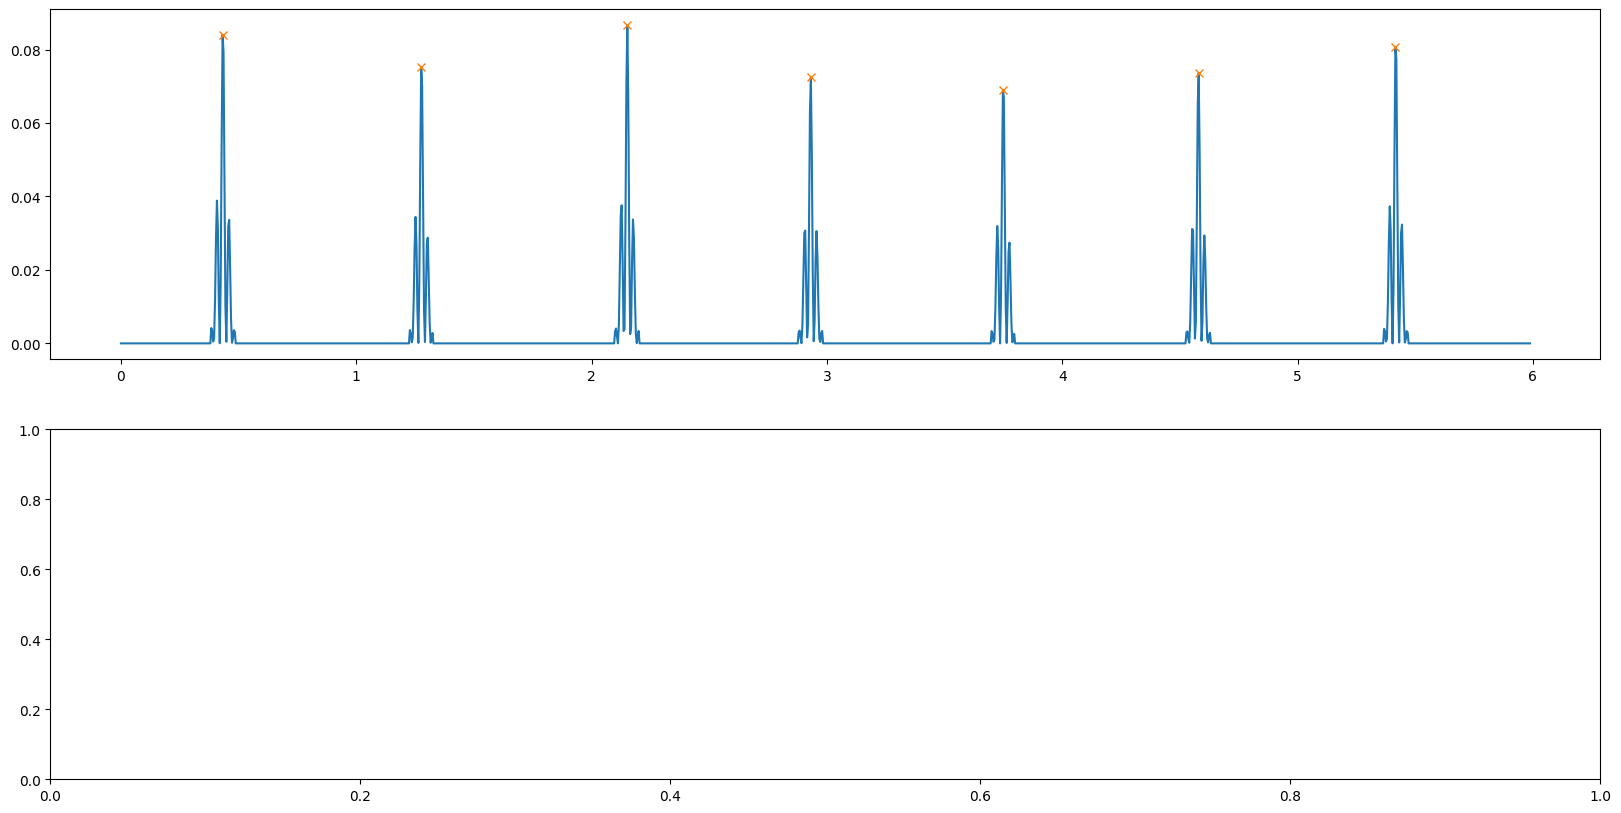

In [8]:


squareddataWindow=squareddata*QRSwindow
print(len(squareddataWindow))
    
fig,ax=plt.subplots(2,1,figsize=(20,10))
ax[0].plot(signaltime[:len(squareddataWindow)],squareddataWindow)


peaks=[i for i, e in enumerate(QRSwindow) if e == 1]
print(peaks)
windowStartPoints=[]
windowStartPoints.append(peaks[0])
start=peaks[0]
for i in range(len(peaks)-1):
    if((peaks[i+1]-peaks[i])>2):
        windowStartPoints.append(peaks[i])
        windowStartPoints.append(peaks[i+1])
windowStartPoints.append(peaks[-1])
print(windowStartPoints)
windows=[]
for i in range(int(len((windowStartPoints))/2)):
    windows.append([windowStartPoints[2*i] , windowStartPoints[2*i+1]])


R_peaks=[]
for j in range(len(windows)):
    OnewindowSignal=squareddataWindow.copy()
    for i in range(len(OnewindowSignal)):
        if(not(i>=windows[j][0] and i<=windows[j][1])):
            OnewindowSignal[i]=0
    R_peaks.append(np.argmax(OnewindowSignal))

# for i in range(len(squareddataWindow)):
#     if(not(i>=windows[j][0] and i<=windows[j][1])):
#         squareddataWindow[i]=0       
    
print(R_peaks)
    
ax[0].plot(signaltime[R_peaks],squareddataWindow[R_peaks],"x")   
R_peaks
R_R=[]
#for i in windowStartPoints:
for i in range(len(R_peaks)-1):
    R_R.append((R_peaks[i+1]-R_peaks[i])*4)
    
   

Period=sum(R_R)
BMP=1000*(len(R_peaks)-1)/Period # pulse per sec
BMP*60
#for i in 


WFDB FILE


In [9]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import wfdb

In [10]:
record = wfdb.rdrecord('/home/dawid/Desktop/Temat1/mit-bih-long-term-ecg-database-1.0.0/14046') 
record.p_signal


array([[ 0.16, -0.29],
       [ 0.18, -0.3 ],
       [ 0.17, -0.32],
       ...,
       [ 0.06, -0.18],
       [ 0.08, -0.18],
       [ 0.08, -0.18]])

In [11]:
ar1=[record.p_signal[i][0] for i in range(record.sig_len)]
#print(ar1)
time=[i for i in range(record.sig_len)]
time
record = wfdb.rdrecord('/home/dawid/Desktop/Temat1/mit-bih-long-term-ecg-database-1.0.0/14134') 
record.p_signal


FileNotFoundError: [Errno 2] No such file or directory: '/home/dawid/Desktop/Temat1/mit-bih-long-term-ecg-database-1.0.0/14134.hea'

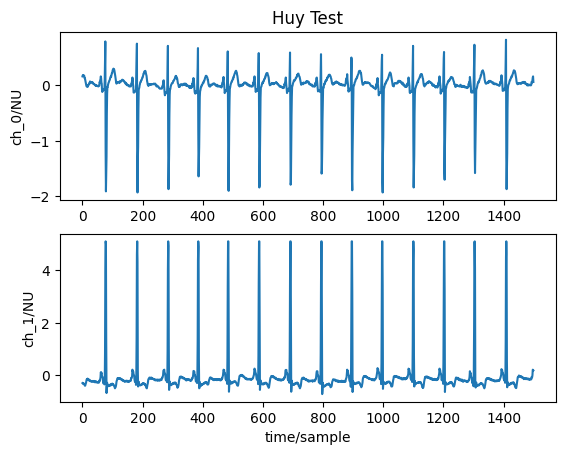

(array([[ 0.16, -0.29],
        [ 0.18, -0.3 ],
        [ 0.17, -0.32],
        ...,
        [ 0.14,  0.22],
        [ 0.16,  0.2 ],
        [ 0.06,  0.19]]),
 {'fs': 128,
  'sig_len': 1500,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['ECG1', 'ECG2'],
  'comments': ['Age: 46  Sex: M']})

1500

In [ ]:


# assign signals as ECG array from 0 to 1500 as your expected range, fields as other information
signals, fields = wfdb.rdsamp('/home/dawid/Desktop/Temat1/mit-bih-long-term-ecg-database-1.0.0/14046', sampto=1500)
# Plot with the array signals, fs as frequency (can be founds in fields['fs'], and title as an optional
wfdb.plot_items(signal=signals, fs=fields['fs'], title='Huy Test')
# Display it with the additional information
display((signals, fields))
len(signals)

In [ ]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp('/home/dawid/Desktop/Temat1/mit-bih-long-term-ecg-database-1.0.0/14046', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)

# Can also read the same files hosted on Physionet
signals2, fields2 = wfdb.rdsamp('14046', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')

ValueError: Input channels must all be lower than the total number of channels